In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
%pwd

'd:\\UIT\\Nam2\\semester2\\Computer vision\\seam-carving-master (1)\\seam-carving-master'

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#Bước 1: Load and show image

img = cv2.imread("./Data/c5.jpg")
clone = img.copy()
clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)

cv2.imshow("Input image", img)

#Step 2: Select ROI
def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping
    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being
    # performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x, y))
        cropping = False
        # draw a rectangle around the region of interest
        cv2.rectangle(img, refPt[0], refPt[1], (0, 0, 0), -1)
        cv2.imshow("Input image", img)
        lst_rois.append(
            clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]])
        
cv2.setMouseCallback("Input image", click_and_crop)

lst_rois = []
refPt = []
cropping = False
while True:
    # display the image and wait for a keypress
    cv2.imshow("Input image", img)

    key = cv2.waitKey(1) & 0xFF
    # if the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()
    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

cv2.destroyAllWindows()
# plt.imshow("mask",img)
cv2.waitKey(0) 


-1

In [5]:
cv2.imwrite("c5.png",img)

True

True

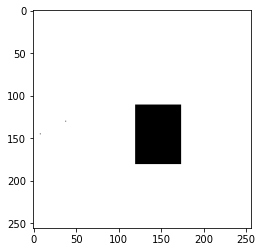

In [7]:
# Define the masked area
mask = cv2.inRange(img, 0, 0)
inverted_msk = 255-mask
plt.imshow(inverted_msk, "gray")
cv2.imwrite("mask.png",mask)
cv2.imwrite("inverted_mask.png",inverted_msk)

# Vizualize the mask
# cv2.imshow("mask",mask)
# cv2.waitKey(0)

In [31]:
!python seam_carving.py -remove -im ./Data/c12.jpg -im_seam ./Data/c12.jpg -out img_resize.png -rmask inverted_msk.png -vis

^C


In [14]:
!python seam_carving.py -resize -im ./c5.png -im_seam ./c5.png -out img_resize.png -maskout ./inverted_msk.png -mask ./mask.png -dx -20 -vis

d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:187: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_minimum_seam" failed type inference due to: Invalid use of type(CPUDispatcher(<function forward_energy at 0x000001E115033490>)) with parameters (array(float64, 3d, C))

During: resolving callee type: type(CPUDispatcher(<function forward_energy at 0x000001E115033490>))
During: typing of call at d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py (195)


File "seam_carving.py", line 195:
def get_minimum_seam(im, mask=None, remove_mask=None):
    <source elided>
    energyfn = forward_energy if USE_FORWARD_ENERGY else backward_energy
    M = energyfn(im)
    ^

  @jit
d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:187: NumbaWarning: 
Compilation is falling back to object mode WITHOUT loopl

In [11]:
!python seam_carving.py -resize -im img_resize.png -im_seam ./c5.png -out img_resize1.png -maskout ./mask2.png -mask ./mask.png -dx +20 -vis

d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:187: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_minimum_seam" failed type inference due to: Invalid use of type(CPUDispatcher(<function forward_energy at 0x00000220CADA7490>)) with parameters (array(uint8, 3d, C))

During: resolving callee type: type(CPUDispatcher(<function forward_energy at 0x00000220CADA7490>))
During: typing of call at d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py (195)


File "seam_carving.py", line 195:
def get_minimum_seam(im, mask=None, remove_mask=None):
    <source elided>
    energyfn = forward_energy if USE_FORWARD_ENERGY else backward_energy
    M = energyfn(im)
    ^

  @jit
d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:187: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplif

(256, 256, 3) (256, 256, 3)


Text(0.5, 1.0, 'Second')

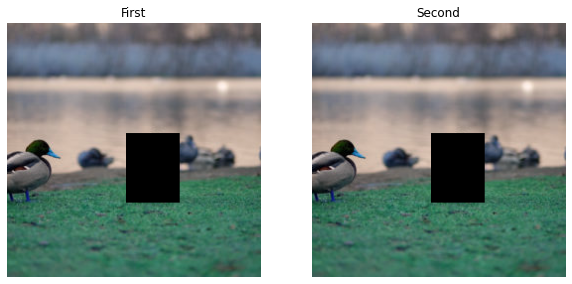

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread("img_resize1.png")
img2 = cv2.imread("./c5.png")
# mask_out=np.rot90(msk_out, 3)
print(img2.shape, img1.shape)

# cv2.imwrite("inverted_msk.png",mask_out)
# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")


Text(0.5, 1.0, 'Second')

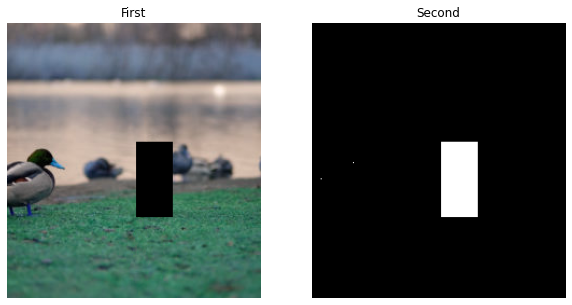

In [17]:
out = cv2.imread("img_resize.png")
msk_out = cv2.imread("./inverted_msk.png")
# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(out)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(msk_out)
plt.axis('off')
plt.title("Second")



True

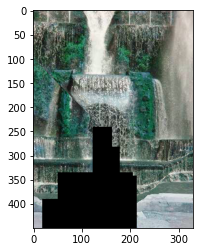

In [195]:
img_resize1 = cv2.imread("img_resize.png")
img_resize1[msk_out!=0] = 0
plt.imshow(img_resize1)
cv2.imwrite("img_resize1.png", img_resize1)

In [20]:
!python main.py img_resize.png inverted_msk.png 4


<CUDA device 0 'b'NVIDIA GeForce RTX 3060 Laptop GPU''>
Computing bestpatch Mon Jun 13 19:13:06 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:12 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:16 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:20 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:24 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:28 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:33 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:38 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:45 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:50 2022
best patch finding
starting updateMats.....
Computing bestpatch Mon Jun 13 19:13:53 2022
best patc

TypeError: Image data of dtype object cannot be converted to float

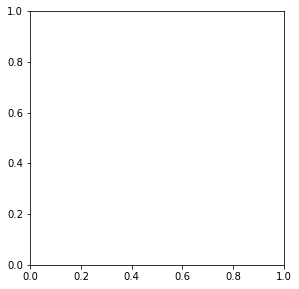

In [140]:
out = cv2.imread("result.png")
msk_out = cv2.imread("./inverted_msk.png")
# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(out)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(msk_out)
plt.axis('off')
plt.title("Second")


In [21]:
!python seam_carving.py -resize -im img_resize.png -im_seam ./c5.png -out img_resize1.png -maskout ./mask2.png -mask ./mask.png -dx +20 -vis

d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:187: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_minimum_seam" failed type inference due to: Invalid use of type(CPUDispatcher(<function forward_energy at 0x00000248BEE67490>)) with parameters (array(uint8, 3d, C))

During: resolving callee type: type(CPUDispatcher(<function forward_energy at 0x00000248BEE67490>))
During: typing of call at d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py (195)


File "seam_carving.py", line 195:
def get_minimum_seam(im, mask=None, remove_mask=None):
    <source elided>
    energyfn = forward_energy if USE_FORWARD_ENERGY else backward_energy
    M = energyfn(im)
    ^

  @jit
d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:187: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplif

True

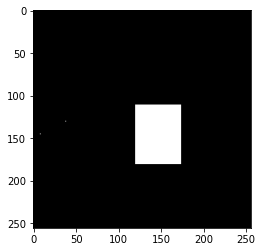

In [22]:
# Define the masked area
image = cv2.imread("img_resize1.png")
mask = cv2.inRange(image, 0, 0)
plt.imshow(mask, "gray")
# inverted_msk = 255-mask
cv2.imwrite("img_resize3_mask.png", mask)
# Vizualize the mask
# cv2.imshow("mask",mask)
# cv2.waitKey(0)


In [121]:
!python main.py img_resize3.png img_resize3_mask.png 4


<CUDA device 0 'b'NVIDIA GeForce RTX 3060 Laptop GPU''>
Computing bestpatch Fri Jun 10 18:22:29 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:34 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:39 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:43 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:45 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:48 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:51 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:54 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:22:57 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:23:01 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:23:04 2022
best patc


Computing bestpatch Fri Jun 10 18:40:11 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:14 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:18 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:21 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:24 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:27 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:31 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:34 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:37 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:40 2022
best patch finding
starting updateMats.....
Computing bestpatch Fri Jun 10 18:40:44 2022
best patch finding
starting updateMats.....
Computing bestpatch 

Text(0.5, 1.0, 'Second')

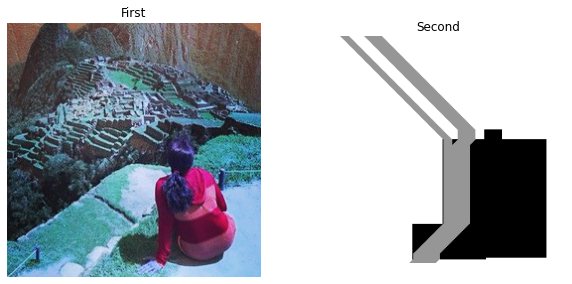

In [195]:
output = cv2.imread("./Data/c18.jpg")
msk_output = cv2.imread("inverted_msk3.png")
# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(output)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(msk_output)
plt.axis('off')
plt.title("Second")


In [196]:
output[msk_output == 150] = 1000
output[msk_output != 150] = 0
plt.imshow(output)
# cv2.imwrite("final_inpaint_mask.jpg",output)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 256 but corresponding boolean dimension is 286

Text(0.5, 1.0, 'Second')

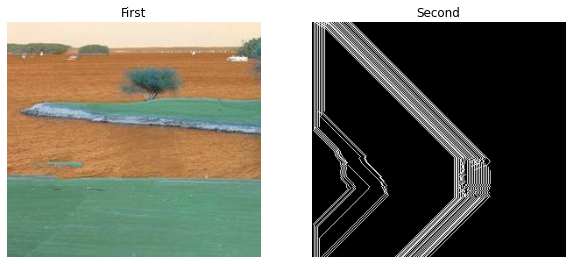

In [26]:
out = cv2.imread("./result/c0_result.jpg")
msk_out = cv2.imread("final_inpaint_mask.jpg")
# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(out)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
# showing image
plt.imshow(msk_out)
plt.axis('off')
plt.title("Second")


In [213]:
image = cv2.imread("./Data/c18_input.jpg")

True

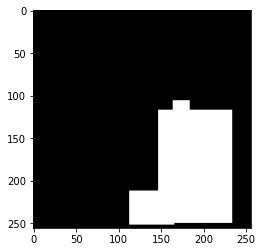

In [226]:
# Define the masked area
mask = cv2.inRange(image, 0, 0)
plt.imshow(mask, "gray")
cv2.imwrite("mask.png", mask)
# Vizualize the mask
# cv2.imshow("mask",mask)
# cv2.waitKey(0)


True

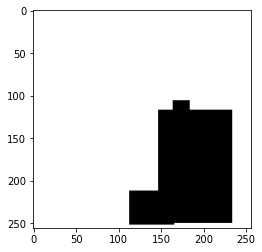

In [225]:
image = cv2.imread("./Data/c18_input.jpg")
# Define the masked area
mask = cv2.inRange(image, 0, 0)
plt.imshow(mask, "gray")
cv2.imwrite("mask.png", mask)
# Vizualize the mask
# cv2.imshow("mask",mask)
# cv2.waitKey(0)

# plt.imshow(msk)
inverted_msk = 255-mask
plt.imshow(inverted_msk,"gray")
cv2.imwrite("inverted_msk.png",inverted_msk)
!python seam_carving.py -remove -im ./Data/c18_input.jpg -im_seam ./Data/c18_input.jpg -out c18_output_seam.png -rmask ./mask.png -vis


d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:184: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_minimum_seam" failed type inference due to: Invalid use of type(CPUDispatcher(<function forward_energy at 0x00000203FED2EEF0>)) with parameters (array(float64, 3d, C))

During: resolving callee type: type(CPUDispatcher(<function forward_energy at 0x00000203FED2EEF0>))
During: typing of call at d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py (192)


File "seam_carving.py", line 192:
def get_minimum_seam(im, mask=None, remove_mask=None):
    <source elided>
    energyfn = forward_energy if USE_FORWARD_ENERGY else backward_energy
    M = energyfn(im)
    ^

  @jit
d:\UIT\Nam2\semester2\Computer vision\seam-carving-master (1)\seam-carving-master\seam_carving.py:184: NumbaWarning: 
Compilation is falling back to object mode WITHOUT loopl